In [200]:
## This notebook should take a csv file from the /build folder and plot what the energy deposited in Ge is

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### This function will take a file and a peak energy (MeV) and number of counts emitted by point source,
####  to find the fraction of the emitted photons that deposited energy in the photopeak in Ge

def photopeak(file,peak,counts):       
    names = ['Edep']
    data = pd.read_csv(file,names=names,header=4).values
    data_peak = data[(data>=peak-0.01) & (data<=peak+0.01)]
    #data_peak2= data_peak[data_peak<=1.1]
    frac= sum(data_peak)/counts
    #print(frac)
    return([frac,peak])


def bigtitle(title,xlabel,ylabel):
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)

In [214]:
peak = np.loadtxt('./data/sweep-macro.dat',skiprows=75)

def E_plot(name):
    E=[]
    
    for i in range(15):
        E.append( photopeak('%s-%i_nt_MyNtuple.csv'%(name,i),peak[i],1e5) )
        
    #print(E)    
    efficiency,energy =  list(zip(*E))
    
    #print(efficiency)
        
        
    #plt.clf()
    plt.scatter(energy,efficiency)
    plt.plot(energy,efficiency,label=name)


    plt.xscale('log')
    plt.yscale('log')  
    
    bigtitle('Photopeak efficiency thickness=%s cm'%name,'Energy (MeV)','Efficiency')

    
    #plt.show()

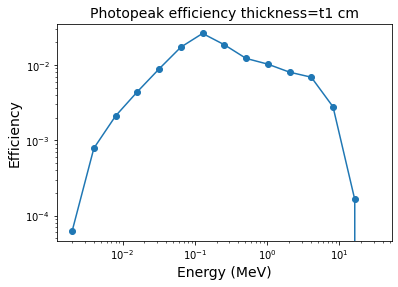

In [215]:
E_plot('t1')

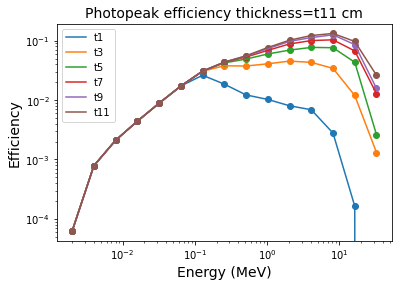

In [216]:
E_plot('t1')
E_plot('t3')
E_plot('t5')
E_plot('t7')
E_plot('t9')
E_plot('t11')

plt.legend()
#plt.xlim(1e-3,10)
plt.show()

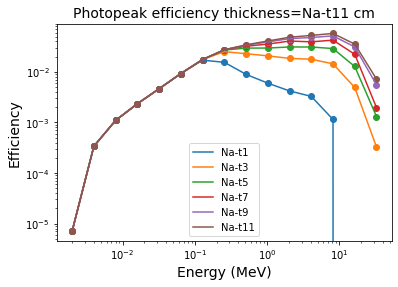

In [217]:
E_plot('Na-t1')
E_plot('Na-t3')
E_plot('Na-t5')
E_plot('Na-t7')
E_plot('Na-t9')
E_plot('Na-t11')

plt.legend()
#plt.xlim(1e-3,10)
plt.show()